## AKINDELE DAVID AWE - 8999846
### CSCN 8010 - 24F - Sec1to2- Founcdations of Machine Learning Framework 
### Professor Ran Feldesh.

1. Obtain the Data: Get the Dogs vs Cats dataset (see class' notebook, only 5000, not 25,000, images are required, these image set is defined in the notebook)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
data_folder = pathlib.Path("Extracted\kaggle_dogs_vs_cats_small")

In [3]:
train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [83]:
for data_batch, labels_batch in test_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [4]:
from pathlib import Path

def dataset_overview(base_dir):
    base_dir = Path(base_dir)
    for subset in ['train', 'validation', 'test']:
        print(f"\nSubset: {subset}")
        for category in ['cat', 'dog']:
            path = base_dir / subset / category
            num_files = len(list(path.glob("*.jpg")))
            print(f"{category}: {num_files} images")
            
dataset_overview("Extracted/kaggle_dogs_vs_cats_small")



Subset: train
cat: 1000 images
dog: 1000 images

Subset: validation
cat: 500 images
dog: 500 images

Subset: test
cat: 1000 images
dog: 1000 images


## EDA: Explore the data with relevant graphs, statistics and insights (5 points)

In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image

def dataset_eda(base_dir):
    base_dir = Path(base_dir)
    
    # Initialize counters for the number of images
    subset_summary = {'train': {'cat': 0, 'dog': 0}, 'validation': {'cat': 0, 'dog': 0}, 'test': {'cat': 0, 'dog': 0}}
    
    # Initialize list to collect image sizes for analysis
    image_sizes = {'cat': [], 'dog': []}
    
    # Iterate through each subset and category
    for subset in ['train', 'validation', 'test']:
        print(f"\nSubset: {subset}")
        
        for category in ['cat', 'dog']:
            path = base_dir / subset / category
            num_files = len(list(path.glob("*.jpg")))
            subset_summary[subset][category] = num_files
            
            # Collect image sizes
            for img_path in path.glob("*.jpg"):
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_sizes[category].append((width, height))
            
            print(f"{category.capitalize()}: {num_files} images")
    

     #*Image size statistics**
    cat_sizes = np.array(image_sizes['cat'])
    dog_sizes = np.array(image_sizes['dog'])
    
    print("\nImage Size Statistics (Width x Height):")
    print(f"  Cats: Mean size: {cat_sizes.mean(axis=0)}, Min size: {cat_sizes.min(axis=0)}, Max size: {cat_sizes.max(axis=0)}")
    print(f"  Dogs: Mean size: {dog_sizes.mean(axis=0)}, Min size: {dog_sizes.min(axis=0)}, Max size: {dog_sizes.max(axis=0)}")
    
    

# Run the EDA on your dataset
dataset_eda("Extracted/kaggle_dogs_vs_cats_small")



Subset: train
Cat: 1000 images
Dog: 1000 images

Subset: validation
Cat: 500 images
Dog: 500 images

Subset: test
Cat: 1000 images
Dog: 1000 images

Image Size Statistics (Width x Height):
  Cats: Mean size: [409.8236 356.7992], Min size: [59 41], Max size: [1023  768]
  Dogs: Mean size: [397.9416 364.33  ], Min size: [59 45], Max size: [1050  702]


The Image Size Statistics for the cats and dogs dataset indicate the following:

Cats:

Mean Size: The average image dimensions for cats are approximately 410x357 pixels.
Min Size: The smallest cat images are 59x41 pixels.
Max Size: The largest cat images are 1023x768 pixels.
Dogs:

Mean Size: The average image dimensions for dogs are approximately 398x364 pixels.
Min Size: The smallest dog images are 59x45 pixels.
Max Size: The largest dog images are 1050x702 pixels.

Train - Cats: 1000, Dogs: 1000
Validation - Cats: 500, Dogs: 500
Test - Cats: 1000, Dogs: 1000
Sample Cat Images from Training Set


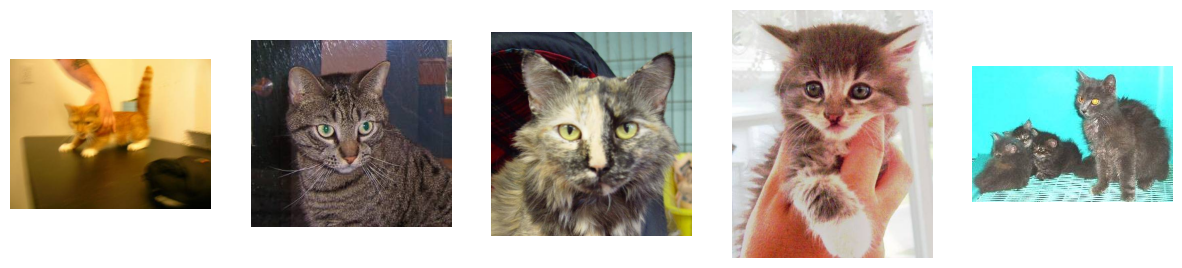

Sample Dog Images from Training Set


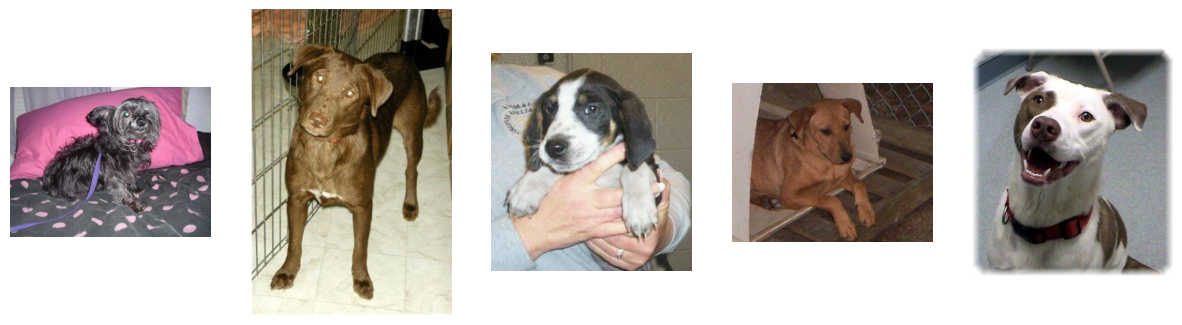

Sample Cat Images from Validation Set


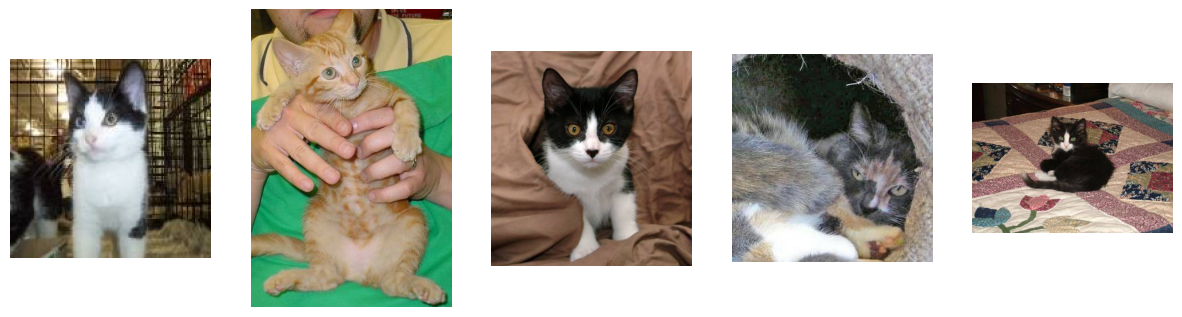

Sample Dog Images from Validation Set


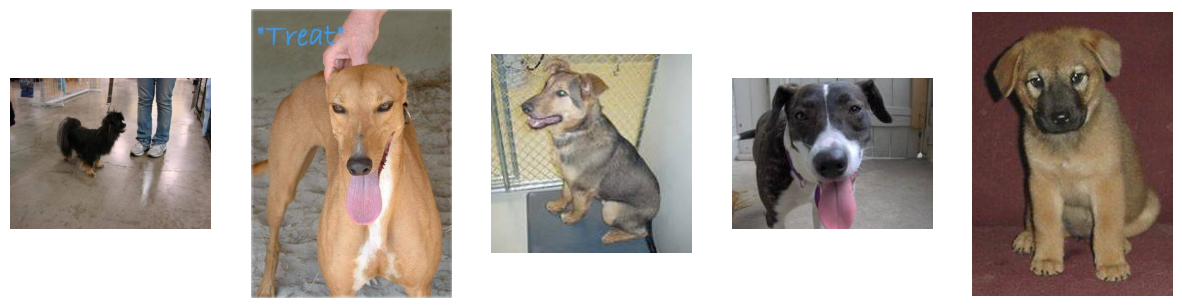

Sample Cat Images from Test Set


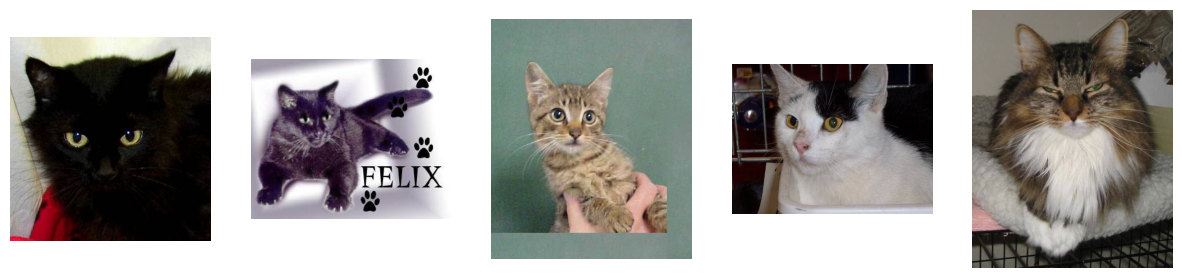

Sample Dog Images from Test Set


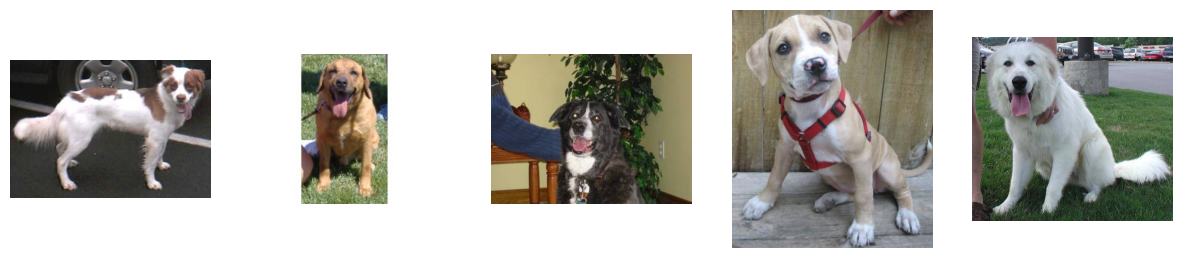

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define base directories
base_dir = os.path.join('Extracted', 'kaggle_dogs_vs_cats_small')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Check if directories exist
if not all(os.path.exists(d) for d in [train_dir, val_dir, test_dir]):
    print("One or more directories do not exist. Please check your paths.")
else:
    # Count files
    train_cats = len(os.listdir(os.path.join(train_dir, "cat")))
    train_dogs = len(os.listdir(os.path.join(train_dir, "dog")))

    val_cats = len(os.listdir(os.path.join(val_dir, "cat")))
    val_dogs = len(os.listdir(os.path.join(val_dir, "dog")))

    test_cats = len(os.listdir(os.path.join(test_dir, "cat")))
    test_dogs = len(os.listdir(os.path.join(test_dir, "dog")))

    # Print counts
    print(f"Train - Cats: {train_cats}, Dogs: {train_dogs}")
    print(f"Validation - Cats: {val_cats}, Dogs: {val_dogs}")
    print(f"Test - Cats: {test_cats}, Dogs: {test_dogs}")

    # Function to plot images
    def plot_images(path, n=5):
        try:
            files = os.listdir(path)[:n]
            fig, axs = plt.subplots(1, n, figsize=(15, 5))
            for i, file in enumerate(files):
                img = Image.open(os.path.join(path, file))
                axs[i].imshow(img)
                axs[i].axis("off")
            plt.show()
        except Exception as e:
            print(f"Error displaying images: {e}")

    # Display sample images
    print("Sample Cat Images from Training Set")
    plot_images(os.path.join(train_dir, "cat"))

    print("Sample Dog Images from Training Set")
    plot_images(os.path.join(train_dir, "dog"))

    print("Sample Cat Images from Validation Set")
    plot_images(os.path.join(val_dir, "cat"))

    print("Sample Dog Images from Validation Set")
    plot_images(os.path.join(val_dir, "dog"))

    print("Sample Cat Images from Test Set")
    plot_images(os.path.join(test_dir, "cat"))

    print("Sample Dog Images from Test Set")
    plot_images(os.path.join(test_dir, "dog"))


Upon review, all images are correctly categorized in their respective folders, with no apparent mislabeling. The cat directory contains only images of cats, and the dog directory exclusively features images of dogs. This accurate organization ensures that the dataset aligns with its intended structure, which is crucial for training a reliable machine learning model. Consistently labeled data contributes to effective learning and minimizes errors during model training and evaluation

Color Channel Analysis for Cats:


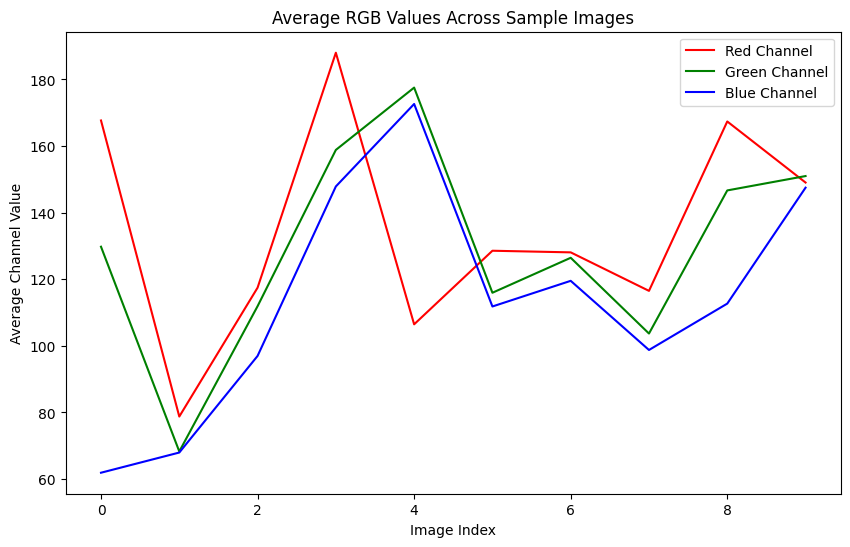

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def analyze_color_channels(image_dir, n=10):
    """
    Analyzes the RGB channel distributions of sample images.
    
    Args:
        image_dir (str): Path to the directory containing images.
        n (int): Number of images to analyze.
    """
    files = os.listdir(image_dir)[:n]
    r_values, g_values, b_values = [], [], []
    
    for file in files:
        file_path = os.path.join(image_dir, file)
        try:
            img = Image.open(file_path).convert("RGB")  # Ensure it's RGB
            img_array = np.array(img)
            r_values.append(np.mean(img_array[:, :, 0]))
            g_values.append(np.mean(img_array[:, :, 1]))
            b_values.append(np.mean(img_array[:, :, 2]))
        except Exception as e:
            print(f"Error processing {file}: {e}")

    # Plotting the distributions
    indices = range(len(r_values))
    plt.figure(figsize=(10, 6))
    plt.plot(indices, r_values, label="Red Channel", color="red")
    plt.plot(indices, g_values, label="Green Channel", color="green")
    plt.plot(indices, b_values, label="Blue Channel", color="blue")
    plt.title("Average RGB Values Across Sample Images")
    plt.xlabel("Image Index")
    plt.ylabel("Average Channel Value")
    plt.legend()
    plt.show()

# Example usage: Analyze training cat images
cat_dir = os.path.join('Extracted', 'kaggle_dogs_vs_cats_small', 'train', 'cat')
dog_dir = os.path.join('Extracted', 'kaggle_dogs_vs_cats_small', 'train', 'dog')

print("Color Channel Analysis for Cats:")
analyze_color_channels(cat_dir)




The graph illustrates the average RGB (Red, Green, Blue) color channel values across a set of sample images of cats. Each line represents one color channel:

Red Channel (Red line): Consistently has the highest average values across most images, indicating a stronger presence of reddish tones in the dataset.
Green Channel (Green line): Averages lower than red but higher than blue, suggesting it contributes moderately to the images' overall tones.
Blue Channel (Blue line): Displays the lowest average values, signifying fewer bluish hues compared to red and green.
These patterns reflect the dominant color compositions, which may help in preprocessing or feature extraction tasks.

Color Channel Analysis for Dogs:


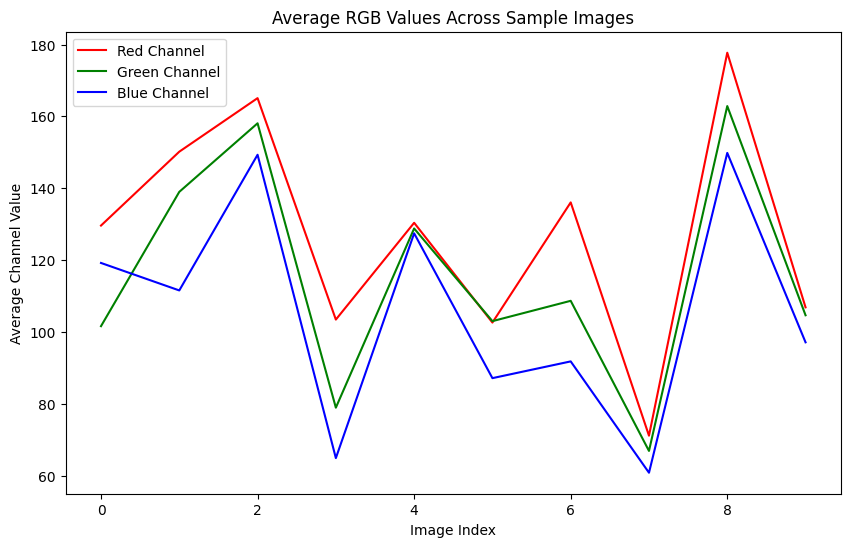

In [7]:
print("Color Channel Analysis for Dogs:")
analyze_color_channels(dog_dir)


The graph illustrates the average RGB (Red, Green, Blue) channel values across a set of sample images of dogs. Each line represents one color channel:

Red Channel (Red line): Consistently shows the highest average values across most images, indicating a stronger presence of reddish tones in the dataset.
Green Channel (Green line): Averages lower than red but higher than blue, contributing moderately to the overall color tones of the images.
Blue Channel (Blue line): Displays the lowest average values, signifying a lesser presence of bluish hues compared to red and green.

3. Train two networks (use callbacks to save the best model version):
Define a Neural Network of your choice (3 points)
Fine-Tune VGG16 (pre-trained on imagenet). Make sure to use validation to test for over-fitting. Plot the appropriate graph (3 points)

In [ ]:
# Defining the input layer with a shape of 180x180 pixels and 3 color channels (RGB)
inputs = keras.Input(shape=(180, 180, 3))  # Input layer for image data

# Normalizing pixel values to a range of 0 to 1 by rescaling them (originally in range 0-255)
x = layers.Rescaling(1./255)(inputs)  # Rescaling layer to normalize image data

# First convolutional layer: Applies 32 filters of size 3x3, followed by a ReLU activation
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)  # Feature extraction

# First pooling layer: Downsamples the feature map by taking the maximum value in 2x2 windows
x = layers.MaxPooling2D(pool_size=2)(x)  # Reduces spatial dimensions by half

# Second convolutional layer: Applies 64 filters of size 3x3, followed by a ReLU activation
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)  # Deeper feature extraction

# Second pooling layer: Again downsampling the feature map by a factor of 2
x = layers.MaxPooling2D(pool_size=2)(x)  # Further reduces spatial dimensions

# Third convolutional layer: Applies 128 filters of size 3x3, followed by a ReLU activation
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)  # Even deeper feature extraction

# Third pooling layer: Downsampling again to reduce spatial dimensions
x = layers.MaxPooling2D(pool_size=2)(x)

# Fourth convolutional layer: Applies 256 filters of size 3x3, followed by a ReLU activation
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)  # More complex features are learned

# Fourth pooling layer: Further reduces the feature map size
x = layers.MaxPooling2D(pool_size=2)(x)

# Fifth convolutional layer: Another 256 filters of size 3x3, followed by a ReLU activation
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)  # Final convolution for rich feature extraction

# Flattening the feature map into a 1D vector to feed into the dense (fully connected) layer
x = layers.Flatten()(x)  # Prepares for classification

# Dense output layer with 1 neuron and sigmoid activation for binary classification
outputs = layers.Dense(1, activation="sigmoid")(x)  # Outputs a probability score

# Define the full model by connecting the inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)  # Create the model


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [11]:
# Define the callback to save the best model based on validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",  # File path where the model will be saved
        save_best_only=True,  # Only saves the model if it improves (based on the monitored metric)
        monitor="val_loss"  # Monitors validation loss to determine if the model is improving
    )
]

# Train the model using the training dataset and validate it on the validation dataset
history = model.fit(
    train_dataset,  # The training dataset used for training the model
    epochs=30,  # Number of times the model will iterate over the entire training dataset
    validation_data=validation_dataset,  # Dataset used to evaluate the model after each epoch
    callbacks=callbacks  # List of callbacks to be applied during training (e.g., saving the best model)
)

Epoch 1/30
63/63 [==============================] - 64s 994ms/step - loss: 0.7111 - accuracy: 0.5205 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 74s 1s/step - loss: 0.6930 - accuracy: 0.5630 - val_loss: 0.6604 - val_accuracy: 0.6130
Epoch 3/30
63/63 [==============================] - 57s 905ms/step - loss: 0.6745 - accuracy: 0.6030 - val_loss: 0.6528 - val_accuracy: 0.6080
Epoch 4/30
63/63 [==============================] - 58s 914ms/step - loss: 0.6371 - accuracy: 0.6420 - val_loss: 0.6589 - val_accuracy: 0.5640
Epoch 5/30
63/63 [==============================] - 61s 965ms/step - loss: 0.6222 - accuracy: 0.6545 - val_loss: 0.5988 - val_accuracy: 0.6570
Epoch 6/30
63/63 [==============================] - 62s 986ms/step - loss: 0.5745 - accuracy: 0.6945 - val_loss: 0.7088 - val_accuracy: 0.6450
Epoch 7/30
63/63 [==============================] - 62s 985ms/step - loss: 0.5487 - accuracy: 0.7300 - val_loss: 0.5850 - val_accuracy: 0.7150
Ep

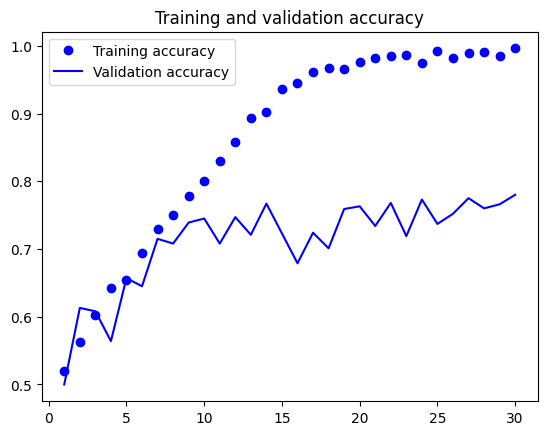

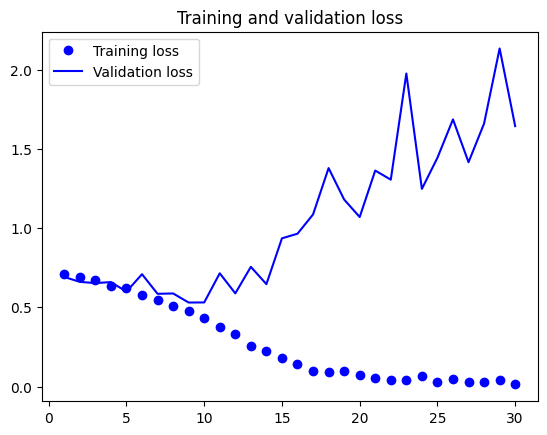

In [12]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

The provided plots illustrate the training and validation accuracy and loss of a machine learning model over 30 epochs. The initial phase of training shows promising results, with both training and validation metrics improving. However, as the training progresses, the model starts to overfit the training data. This is evident from the increasing validation loss while the training loss continues to decrease

In [ ]:
test_model = keras.models.load_model("./models/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") #providing the accuracy of the best model version

63/63 [==============================] - 14s 211ms/step - loss: 0.5438 - accuracy: 0.7405
Test accuracy: 0.740


Found 2000 files belonging to 2 classes.
63/63 [==============================] - 15s 236ms/step
Confusion Matrix: 
[[476 524]
 [445 555]]
Precision: 0.514
Recall: 0.555
F1-Score: 0.534


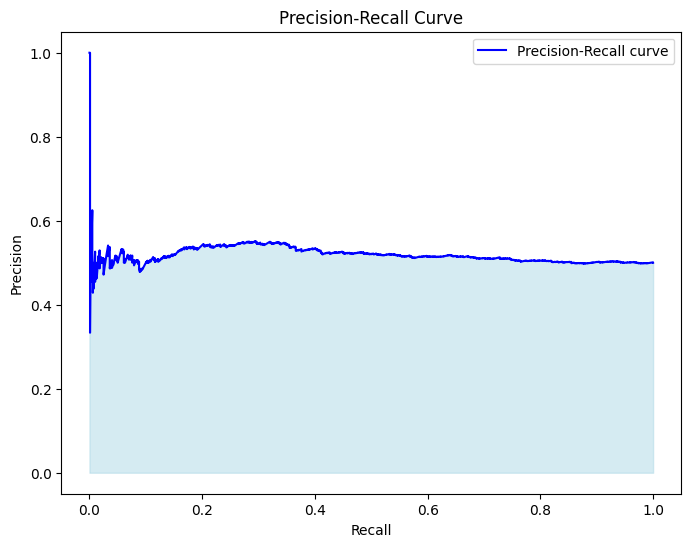

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the model
test_model = tf.keras.models.load_model("./models/convnet_from_scratch.keras")

# Load the test dataset
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32
)

# Get true labels (y_true)
true_labels = np.concatenate([y for _, y in test_dataset], axis=0)

# Get predictions from the model (probabilities)
pred_probs = test_model.predict(test_dataset).flatten()

# Convert probabilities to binary predictions
predictions = (pred_probs > 0.5).astype("int32")

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)
print(f"Confusion Matrix: \n{cm}")

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

# Print the metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Calculate Precision-Recall curve values
precision_vals, recall_vals, thresholds = precision_recall_curve(true_labels, pred_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color="blue", label="Precision-Recall curve")
plt.fill_between(recall_vals, precision_vals, color="lightblue", alpha=0.5)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()


1/1 [==============================] - 0s 131ms/step


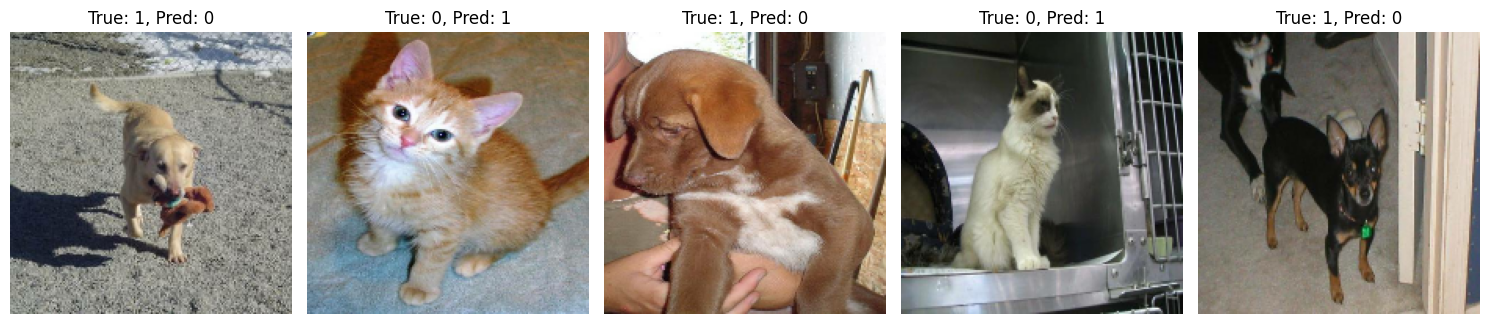

In [98]:
def show_incorrect_predictions(model, dataset, num_images=5, image_size =(10,10)):
    """
    Displays a sample of incorrect predictions from a dataset.

    Parameters:
    - model: Trained Keras model used for predictions.
    - dataset: tf.data.Dataset containing images and true labels.
    - num_images: Number of incorrect predictions to display (default: 5).
    """
    incorrect_images = []
    incorrect_labels = []
    predictions = []

    # Iterate through the test dataset
    for images, labels in dataset:
        # Predict the labels using the model
        preds = model.predict(images)  # Shape: (batch_size, 1)
        preds = (preds > 0.5).astype("int32").flatten()  # Convert probabilities to binary predictions

        # Flatten the true labels to match the predictions
        labels = labels.numpy().flatten()

        # Find the indices of incorrect predictions
        incorrect_mask = preds != labels

        # Append incorrect images, labels, and predictions
        incorrect_images.extend(images[incorrect_mask].numpy())  # Convert tensors to NumPy arrays
        incorrect_labels.extend(labels[incorrect_mask])
        predictions.extend(preds[incorrect_mask])

    # Ensure there's at least one incorrect prediction
    if not incorrect_images:
        print("No incorrect predictions found!")
        return

    # Limit the number of images to display
    num_images = min(num_images, len(incorrect_images))

    # Plot incorrect predictions
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axs[i]
        ax.imshow(incorrect_images[i].astype("uint8"))
        ax.axis('off')
        ax.set_title(f"True: {incorrect_labels[i]}, Pred: {predictions[i]}")
    plt.tight_layout()
    plt.show()

# Call the function to show incorrect predictions
show_incorrect_predictions(model, test_dataset)




The ConvNet model's performance on the test set is moderate, as reflected in the confusion matrix and evaluation metrics. The model correctly classified 476 true negatives (cats classified as cats) and 555 true positives (dogs classified as dogs). However, it also made a significant number of errors, with 524 false positives (cats misclassified as dogs) and 445 false negatives (dogs misclassified as cats).

The precision of 0.514 indicates that when the model predicts a sample as a dog, it is correct only 51.4% of the time. The recall of 0.555 shows that the model successfully identifies 55.5% of all actual dogs. The F1-score of 0.534, which balances precision and recall, highlights the model’s difficulty in handling misclassifications effectively.

Visualizing the incorrect predictions provides qualitative insight into the areas where the model struggles. Some examples might involve blurry images, ambiguous features, or overlaps in characteristics (e.g., small dogs resembling cats or vice versa).

While the model effectively captures hierarchical features through its five convolutional layers, enabling accurate classifications in many cases, it struggles with specific errors. These include ambiguous cases like blurry images or overlapping characteristics between classes (e.g., small dogs resembling cats). Additionally, the relatively close number of misclassifications in both classes suggests the model has difficulties generalizing to the test data, which may be a result of overfitting.
Improvements such as data augmentation, hyperparameter tuning, or using a more advanced architecture could help enhance the model’s performance by reducing misclassifications.

The Precision-Recall curve demonstrates the model's tradeoff between precision and recall across various thresholds. While the curve stabilizes around a precision of 0.5-0.6 for most recall values, the initial sharp spike suggests overconfidence at very low recall levels, likely due to the model making limited but highly confident predictions. However, the relatively flat and low curve indicates the model struggles to balance precision and recall effectively, reflecting its moderate performance metrics (precision: 0.514, recall: 0.555, F1-score: 0.534

FINE TUNING THE VGG 16 MODEL 

In [ ]:
# Importing the VGG16 model from Keras applications
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",  # Specifying that the model should use pre-trained weights from ImageNet
    include_top=False) #removing the top of the layer which we will build our own later on 


In [ ]:
conv_base.trainable = False # Freezing the convolutional base to prevent it from being updated during training
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
#Building the top layer of the vgg
inputs = keras.Input(shape=(180, 180, 3))
x = keras.applications.vgg16.preprocess_input(inputs)  # Preprocess the input directly
x = conv_base(x)  # Pass the preprocessed input through the VGG16 convolutional base
x = layers.Flatten()(x)  # Flatten the output
x = layers.Dense(256, activation="relu")(x)  # Add Dense layer with ReLU activation
x = layers.Dropout(0.5)(x)  # Add Dropout for regularization
outputs = layers.Dense(1, activation="sigmoid")(x)  # Output layer with sigmoid activation
model = keras.Model(inputs, outputs)


In [31]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277056   
                                                           

After building the head and passing the preprocessed inputs into the layers, we run 5 epochs to find the best version of the model

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "./models/finetuned_vgg16_model.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 289s 5s/step - loss: 6.1003 - accuracy: 0.9240 - val_loss: 0.9612 - val_accuracy: 0.9630
Epoch 2/5
63/63 [==============================] - 280s 4s/step - loss: 1.1889 - accuracy: 0.9635 - val_loss: 1.4513 - val_accuracy: 0.9560
Epoch 3/5
63/63 [==============================] - 281s 4s/step - loss: 0.7694 - accuracy: 0.9780 - val_loss: 0.5878 - val_accuracy: 0.9790
Epoch 4/5
63/63 [==============================] - 279s 4s/step - loss: 0.2445 - accuracy: 0.9880 - val_loss: 0.4347 - val_accuracy: 0.9830
Epoch 5/5
63/63 [==============================] - 278s 4s/step - loss: 0.1222 - accuracy: 0.9935 - val_loss: 0.5259 - val_accuracy: 0.9810


In [33]:
test_model = keras.models.load_model(
    "./models/finetuned_vgg16_model.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 184s 3s/step - loss: 0.5788 - accuracy: 0.9745
Test accuracy: 0.975


Best model for this version returned an accuracy of 97.5% which is much better than the neural network from scratch (accuracy of 74%), i will try to see if this score can be further improved

In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Now i will unfreeze the convolutional base so its weight can be updated during training and i will freeze all layers except for the last 4 layers of the convolutional base.

In [35]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [36]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277056   
                                                           

In [37]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 305s 5s/step - loss: 0.1010 - accuracy: 0.9945 - val_loss: 0.5117 - val_accuracy: 0.9770
Epoch 2/5
63/63 [==============================] - 303s 5s/step - loss: 0.1242 - accuracy: 0.9935 - val_loss: 0.5282 - val_accuracy: 0.9820
Epoch 3/5
63/63 [==============================] - 303s 5s/step - loss: 0.0202 - accuracy: 0.9985 - val_loss: 0.5608 - val_accuracy: 0.9770
Epoch 4/5
63/63 [==============================] - 315s 5s/step - loss: 0.0319 - accuracy: 0.9965 - val_loss: 0.6101 - val_accuracy: 0.9760
Epoch 5/5
63/63 [==============================] - 311s 5s/step - loss: 0.0148 - accuracy: 0.9970 - val_loss: 0.6461 - val_accuracy: 0.9790


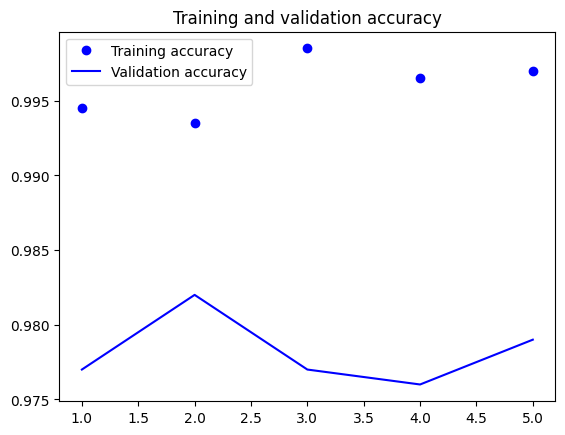

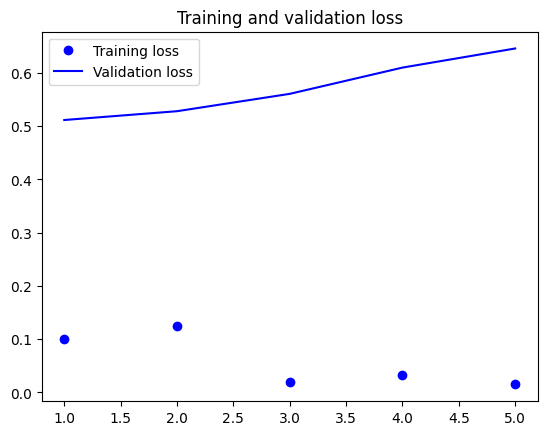

In [38]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [39]:
model = keras.models.load_model("./models/fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 180s 3s/step - loss: 0.7911 - accuracy: 0.9740
Test accuracy: 0.974


After freezing all layers except for the last 4 layers, and trained the model with 5 epochs, the best version of this model returned an accuracy of 97.4% which was less than the accuracy gotten before. Therefore i will then unfreeze those layers and make them trainable and train the model with 20 epochs to see if we get an even higher acccuracy

UNFREEZING THE LAYERS AND MAKING THEM TRAINABLE

In [41]:
# Set the entire base model to be trainable
conv_base.trainable = True

# Unfreeze the layers that were frozen earlier
for layer in conv_base.layers[:-4]:
    layer.trainable = True

In [43]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20


63/63 [==============================] - 305s 5s/step - loss: 0.0804 - accuracy: 0.9945 - val_loss: 0.5679 - val_accuracy: 0.9780
Epoch 2/20
63/63 [==============================] - 305s 5s/step - loss: 0.0350 - accuracy: 0.9960 - val_loss: 0.8011 - val_accuracy: 0.9720
Epoch 3/20
63/63 [==============================] - 303s 5s/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.6481 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 305s 5s/step - loss: 0.0166 - accuracy: 0.9975 - val_loss: 0.5057 - val_accuracy: 0.9790
Epoch 5/20
63/63 [==============================] - 305s 5s/step - loss: 6.0846e-05 - accuracy: 1.0000 - val_loss: 0.5585 - val_accuracy: 0.9800
Epoch 6/20
63/63 [==============================] - 303s 5s/step - loss: 0.0407 - accuracy: 0.9990 - val_loss: 0.4263 - val_accuracy: 0.9830
Epoch 7/20
63/63 [==============================] - 304s 5s/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.4777 - val_accuracy: 0.9790
Epoch 8/20
63/63 [==

In [9]:
model = keras.models.load_model("./models/fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 184s 3s/step - loss: 0.4911 - accuracy: 0.9760
Test accuracy: 0.976


I now attain an accuracy of 97.6% which supercedes the accuracy of the other models, therefore this model can be said to be the best model to solve the problem of classifying cats and dogs.

Found 2000 files belonging to 2 classes.
63/63 [==============================] - 204s 3s/step
Confusion Matrix: 
[[518 482]
 [488 512]]
Precision: 0.515
Recall: 0.512
F1-Score: 0.514


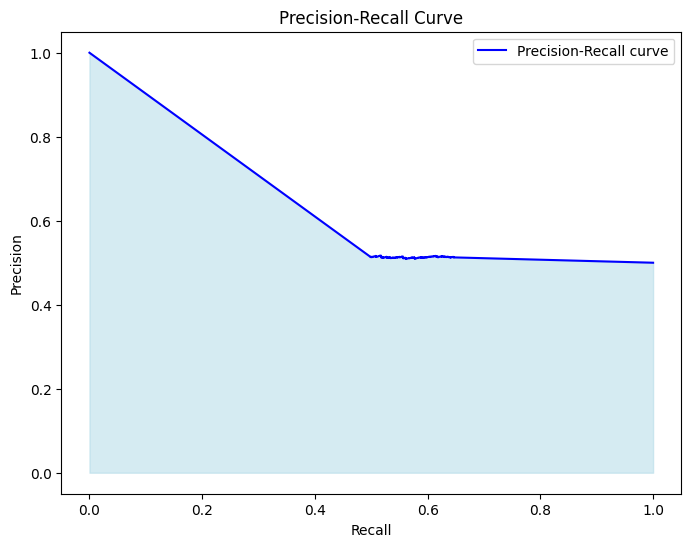

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the model
test_model = tf.keras.models.load_model("./models/fine_tuning2.keras")

# Load the test dataset
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32
)

# Get true labels (y_true)
true_labels = np.concatenate([y for _, y in test_dataset], axis=0)

# Get predictions from the model (probabilities, not just binary predictions)
pred_probs = test_model.predict(test_dataset)

# Convert probabilities to binary predictions (threshold of 0.5)
predictions = (pred_probs > 0.5).astype("int32").flatten()

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)
print(f"Confusion Matrix: \n{cm}")

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

# Print the metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Calculate Precision-Recall curve values (for the probabilities)
precision_vals, recall_vals, thresholds = precision_recall_curve(true_labels, pred_probs.flatten())

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color="blue", label="Precision-Recall curve")
plt.fill_between(recall_vals, precision_vals, color="lightblue", alpha=0.5)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()


Findings from the Confusion Matrix
True Positives (TP): 512
The model correctly predicted 512 positive samples.
True Negatives (TN): 518
The model correctly predicted 518 negative samples.
False Positives (FP): 482
The model incorrectly predicted 482 negative samples as positive.
False Negatives (FN): 488
The model incorrectly predicted 488 positive samples as negative.

The model's performance, with precision, recall, and F1-score around 0.51, indicates it performs only slightly better than random guessing, as reflected in the confusion matrix where false positives (482) and false negatives (488) are nearly equal. This suggests the model struggles to distinguish between classes effectively and lacks a well-optimized decision boundary. Improving performance may involve enhancing dataset quality (e.g., addressing class imbalance or mislabeled data), refining the model architecture, adjusting the decision threshold, or revisiting training strategies such as hyperparameter tuning and augmentations. Error analysis on misclassified samples can also provide insights for targeted improvements.


The Precision-Recall curve shows a steep drop in precision as recall increases, indicating that the model is initially conservative in predicting positives but struggles to maintain precision as it tries to capture more true positives. The curve stabilizes at mid to high recall values but remains overall low, reflecting the model's limited ability to balance precision and recall effectively. This aligns with the observed metrics (precision: 0.515, recall: 0.512) and suggests the need for threshold tuning or improvements in the model’s feature representation and training to better distinguish between classes.

1/1 [==============================] - 2s 2s/step


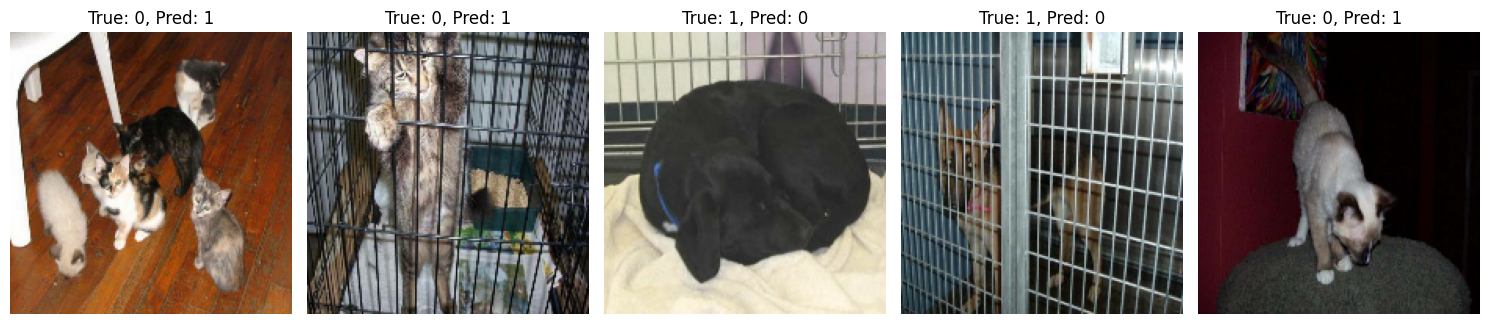

In [10]:
def show_incorrect_predictions(model, dataset, num_images=5, image_size =(10,10)):
    """
    Displays a sample of incorrect predictions from a dataset.

    Parameters:
    - model: Trained Keras model used for predictions.
    - dataset: tf.data.Dataset containing images and true labels.
    - num_images: Number of incorrect predictions to display (default: 5).
    """
    incorrect_images = []
    incorrect_labels = []
    predictions = []

    # Iterate through the test dataset
    for images, labels in dataset:
        # Predict the labels using the model
        preds = model.predict(images)  # Shape: (batch_size, 1)
        preds = (preds > 0.5).astype("int32").flatten()  # Convert probabilities to binary predictions

        # Flatten the true labels to match the predictions
        labels = labels.numpy().flatten()

        # Find the indices of incorrect predictions
        incorrect_mask = preds != labels

        # Append incorrect images, labels, and predictions
        incorrect_images.extend(images[incorrect_mask].numpy())  # Convert tensors to NumPy arrays
        incorrect_labels.extend(labels[incorrect_mask])
        predictions.extend(preds[incorrect_mask])

    # Ensure there's at least one incorrect prediction
    if not incorrect_images:
        print("No incorrect predictions found!")
        return

    # Limit the number of images to display
    num_images = min(num_images, len(incorrect_images))

    # Plot incorrect predictions
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axs[i]
        ax.imshow(incorrect_images[i].astype("uint8"))
        ax.axis('off')
        ax.set_title(f"True: {incorrect_labels[i]}, Pred: {predictions[i]}")
    plt.tight_layout()
    plt.show()

# Call the function to show incorrect predictions
show_incorrect_predictions(model, test_dataset)


## MY CONCLUSION
Both models, the initial ConvNet and the fine-tuned VGG16, demonstrate moderate performance in distinguishing between classes, with noticeable challenges in misclassifying samples. The models correctly identify many instances but also struggle with ambiguous or overlapping features, resulting in a significant number of false positives and false negatives. Despite capturing hierarchical features and learning from the data, the models’ inability to effectively generalize suggests potential overfitting and insufficient differentiation between the classes. To enhance performance, improvements in data quality, such as addressing class imbalance, as well as refining model architecture, augmenting data, and adjusting decision thresholds, are needed for better classification accuracy.

Recommendations for Improvement:  
Data Augmentation: Introducing more variation in the training data could help the model generalize better to unseen examples and improve classification accuracy, especially for ambiguous or blurry images.  
Hyperparameter Tuning: Fine-tuning hyperparameters could enhance the model's performance, particularly regarding the decision boundary and regularization to prevent overfitting.  
Architecture Refinement: Considering a more advanced or complex model might help improve feature extraction and classification, or adding more convolutional layers could help the model handle more complex patterns.  
Threshold Tuning: Adjusting the decision threshold for classification could help find a better balance between precision and recall, leading to fewer misclassifications.  
  

In conclusion, while the model shows moderate success in classifying dogs and cats, its performance can be significantly improved through targeted enhancements to the data, model, and training processes.